<a href="https://colab.research.google.com/github/mariapiachiatante/AMD-DSE-MBA-Project/blob/main/AMD_DSE_Project_MP_Chiatante_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the kaggle json API using my personal tokens
!pip install -q kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"maryperry21","key":"38a8106ef3fb5404644665cfa2f28268"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Import the IMDB dataset through the kaggle API
!kaggle datasets download -d ashirwadsangwan/imdb-dataset
!unzip imdb-dataset.zip

 99% 1.43G/1.44G [00:13<00:00, 123MB/s]
100% 1.44G/1.44G [00:13<00:00, 112MB/s]
Archive:  imdb-dataset.zip
  inflating: name.basics.tsv.gz      
  inflating: name.basics.tsv/name.basics.tsv  
  inflating: title.akas.tsv.gz       
  inflating: title.akas.tsv/title.akas.tsv  
  inflating: title.basics.tsv.gz     
  inflating: title.basics.tsv/title.basics.tsv  
  inflating: title.principals.tsv.gz  
  inflating: title.principals.tsv/title.principals.tsv  
  inflating: title.ratings.tsv.gz    
  inflating: title.ratings.tsv/title.ratings.tsv  


In [ ]:
#Install necessary libraries 
!pip install pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession #this allows us to perform sql queries in Spark
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 9.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=bddc1595a4663554d17e394c6da1e2de54be24f9c3ed36f4d21998e00e031c0e
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
#Create a Spark Session and increase the memory in order to avoid future errors
MAX_MEMORY = "5g"
spark = SparkSession.builder.enableHiveSupport().config("spark.executor.memory", MAX_MEMORY).config("spark.driver.memory", MAX_MEMORY).getOrCreate()

In [ ]:
#Read the tables contained in the IMDB dataset
title_akas = spark.read.csv("/content/title.akas.tsv", sep='\t', header=True, inferSchema=True)
title_basics = spark.read.csv("/content/title.basics.tsv", sep='\t', header=True, inferSchema=True)
title_principals = spark.read.csv("/content/title.principals.tsv", sep='\t', header=True, inferSchema=True)
title_ratings = spark.read.csv("/content/title.ratings.tsv", sep='\t', header=True, inferSchema=True)
name_basics= spark.read.csv("/content/name.basics.tsv/name.basics.tsv", sep='\t', header=True, inferSchema=True)

In [ ]:
#Create a temporary view for each table 
title_akas.createOrReplaceTempView("title_akas")
title_basics.createOrReplaceTempView("title_basics")
title_principals.createOrReplaceTempView("title_principals")
title_ratings.createOrReplaceTempView("title_ratings")
name_basics.createOrReplaceTempView("name_basics")

In [ ]:
title_akas.show(n = 20)

+---------+--------+--------------------+------+--------+-----------+--------------------+---------------+
|  titleId|ordering|               title|region|language|      types|          attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+--------------------+---------------+
|tt0000001|       1|Carmencita - span...|    HU|      \N|imdbDisplay|                  \N|              0|
|tt0000001|       2|          Καρμενσίτα|    GR|      \N|         \N|                  \N|              0|
|tt0000001|       3|          Карменсита|    RU|      \N|         \N|                  \N|              0|
|tt0000001|       4|          Carmencita|    US|      \N|         \N|                  \N|              0|
|tt0000001|       5|          Carmencita|    \N|      \N|   original|                  \N|              1|
|tt0000002|       1|Le clown et ses c...|    \N|      \N|   original|                  \N|              1|
|tt0000002|       2|   A bohóc és kut

In [ ]:
title_basics.show(n = 5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            \N|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [ ]:
title_principals.show(n = 5)

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
+---------+--------+---------+---------------+--------------------+-----------+
only showing top 5 rows



In [ ]:
title_ratings.show(n = 5)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
|tt0000003|          6.5|    1207|
|tt0000004|          6.2|     113|
|tt0000005|          6.1|    1934|
+---------+-------------+--------+
only showing top 5 rows



In [ ]:
name_basics.show(n=5)

+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0050419,tt00531...|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0071877,tt01170...|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00491...|
|nm0000004|   John Belushi|     1949|     1982|actor,writer,soun...|tt0077975,tt00725...|
|nm0000005| Ingmar Bergman|     1918|     2007|writer,director,a...|tt0069467,tt00509...|
+---------+---------------+---------+---------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
#Remove duplicates
title_akas.dropDuplicates()
title_basics.dropDuplicates()
title_principals.dropDuplicates()
title_ratings.dropDuplicates()
name_basics.dropDuplicates()

DataFrame[nconst: string, primaryName: string, birthYear: string, deathYear: string, primaryProfession: string, knownForTitles: string]

In [ ]:
#Identify all the different categories of people, since later on we will be interested only in actors for the mba
query = """SELECT DISTINCT category
           FROM title_principals"""

res = spark.sql(query) 
res.show()

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|             writer|
|           composer|
|           director|
|               self|
|              actor|
|             editor|
|    cinematographer|
|      archive_sound|
|production_designer|
|    archive_footage|
+-------------------+



# Exploratory analysis

Top 20 titles with highest average rating

In [ ]:
query1 = """SELECT primaryTitle, averageRating
            FROM title_ratings as r
            LEFT JOIN title_basics as b
            ON r.tconst = b.tconst                  
            ORDER BY averageRating DESC
            LIMIT 20"""

res1 = spark.sql(query1) 
res1.show()

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|Zwischenfall im Roxy|         10.0|
|Episode dated 13 ...|         10.0|
|              Whoosh|         10.0|
|Innocent Bi-Standers|         10.0|
|      Episode #2.200|         10.0|
|Episode dated 18 ...|         10.0|
|Third Nudist Phon...|         10.0|
|              Tongue|         10.0|
|  The Ties That Bind|         10.0|
|So You Wanna Be a...|         10.0|
|   Murder, They Said|         10.0|
|Arturo Benedetti ...|         10.0|
|       Episode #2.23|         10.0|
|    Der Kaktusgarten|         10.0|
|Helen Reddy, Dom ...|         10.0|
|          So I Creep|         10.0|
|        Episode #1.3|         10.0|
|The Fantastic Voyage|         10.0|
|Cement the Relati...|         10.0|
|Sarah Hughes: A L...|         10.0|
+--------------------+-------------+



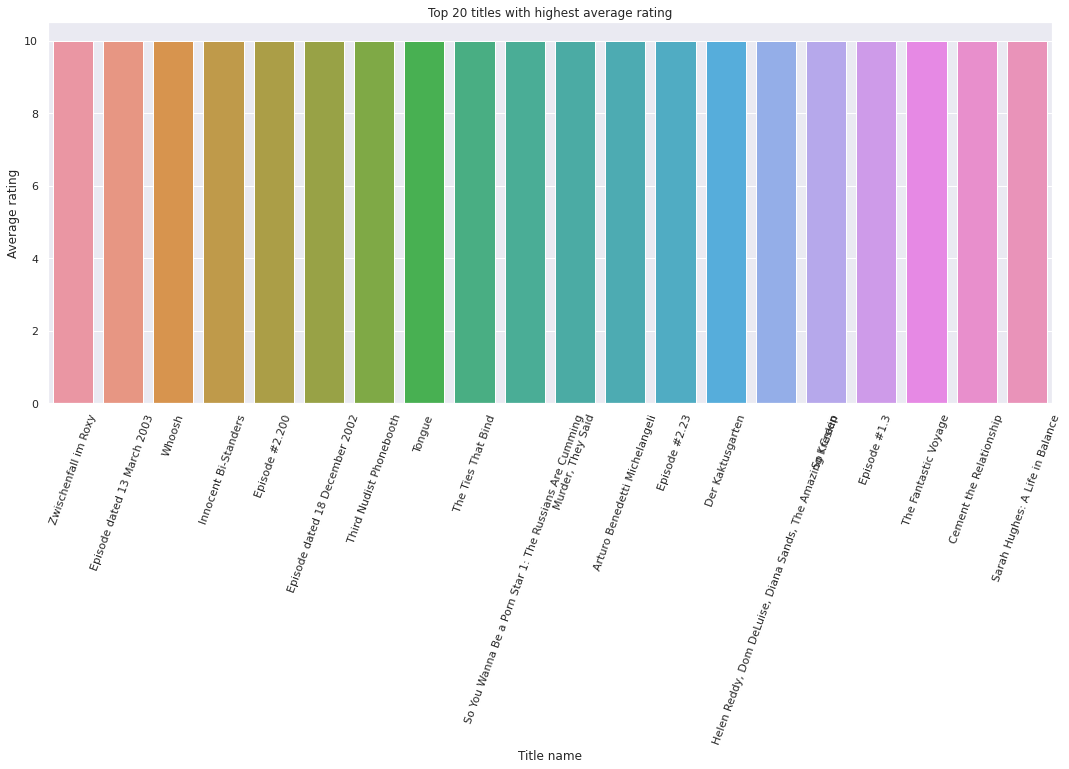

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
ax = sns.barplot(x = "primaryTitle", y = "averageRating", data = res1.toPandas())
ax.set(title = "Top 20 titles with highest average rating", xlabel = "Title name", ylabel = "Average rating")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Top 20 most voted movies

In [ ]:
query2 = """SELECT primaryTitle, numVotes
                  FROM title_ratings as r
                  LEFT JOIN title_basics as b
                  ON r.tconst = b.tconst
                  ORDER BY numVotes DESC
                  LIMIT 20"""

res2 = spark.sql(query2)
res2.show() 

+--------------------+--------+
|        primaryTitle|numVotes|
+--------------------+--------+
|The Shawshank Red...| 2159745|
|     The Dark Knight| 2134602|
|           Inception| 1892958|
|          Fight Club| 1725444|
|        Pulp Fiction| 1695159|
|        Forrest Gump| 1662609|
|     Game of Thrones| 1606096|
|          The Matrix| 1554345|
|The Lord of the R...| 1548920|
|The Lord of the R...| 1533632|
|       The Godfather| 1482225|
|The Dark Knight R...| 1421506|
|The Lord of the R...| 1387208|
|        Interstellar| 1348184|
|               Se7en| 1327441|
|        Breaking Bad| 1280143|
|    Django Unchained| 1249336|
|           Gladiator| 1246819|
|       Batman Begins| 1225060|
|        The Avengers| 1206913|
+--------------------+--------+



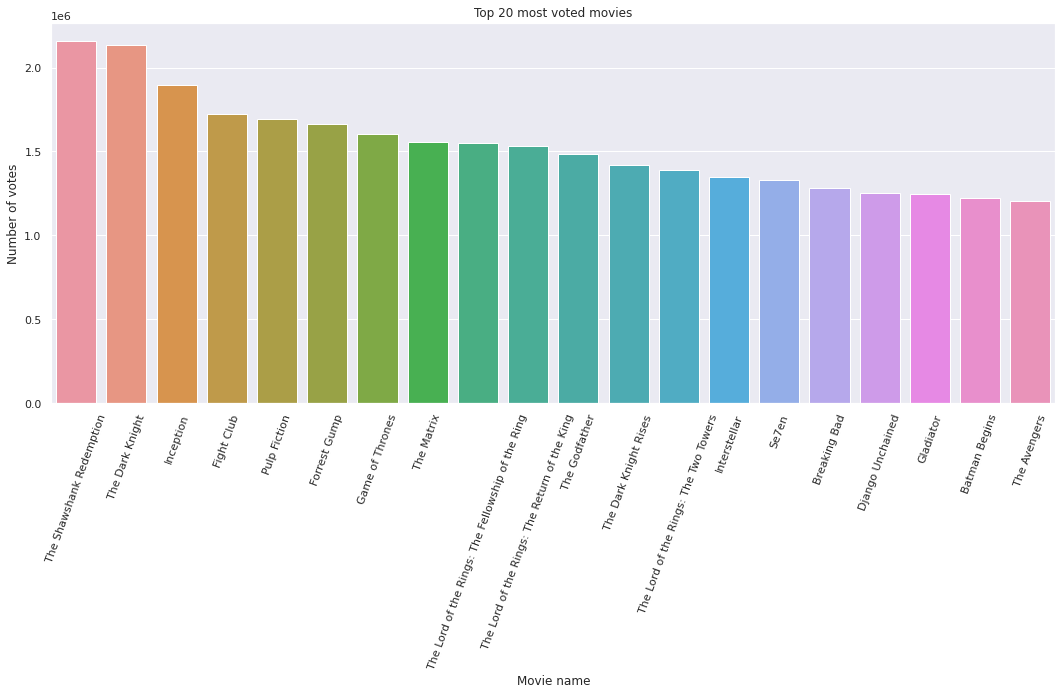

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
ax = sns.barplot(x = "primaryTitle", y = "numVotes", data = res2.toPandas())
ax.set(title = "Top 20 most voted movies", xlabel = "Movie name", ylabel = "Number of votes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

People's distribution among the different categories

In [ ]:
query3 = """SELECT category, COUNT(nconst) AS n_people
           FROM title_principals
           GROUP BY category
           ORDER BY n_people DESC"""

res3 = spark.sql(query3)

In [ ]:
res3 = res3.toPandas()
res3 = res3.set_index("category")
res3

,n_people
category,
actor,8493701
actress,6325097
self,6153089
writer,4811596
director,4179106
producer,2197866
composer,1313187
cinematographer,1300404
editor,1197669


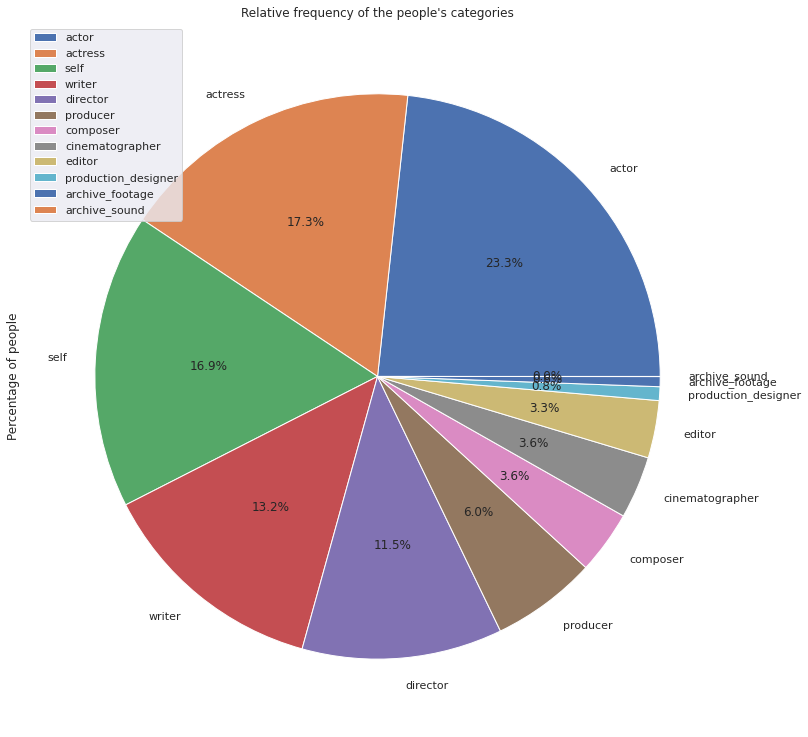

In [ ]:
pie = res3.plot.pie(y = "n_people", figsize = (13,13), autopct = "%1.1f%%")
pie.legend(loc = "upper left");
pie.set(title = "Relative frequency of the people's categories", ylabel = "Percentage of people");

Average runtime for each movie type

In [ ]:
query4 = """SELECT titleType, AVG(runtimeMinutes) AS avg_runtime
           FROM title_basics
           GROUP BY titleType
           ORDER BY avg_runtime"""

res4 = spark.sql(query4) 
res4.show()

+------------+------------------+
|   titleType|       avg_runtime|
+------------+------------------+
|       short|13.107165255566008|
|     tvShort|20.731231813773036|
|   tvEpisode| 37.45187286069087|
|    tvSeries|46.668917739618436|
|       video| 56.29994055897646|
|     tvMovie| 74.23942253448895|
|   videoGame| 77.48520710059172|
|       movie| 88.35246178357153|
|   tvSpecial| 95.27019961977186|
|tvMiniSeries| 101.1495595901492|
+------------+------------------+



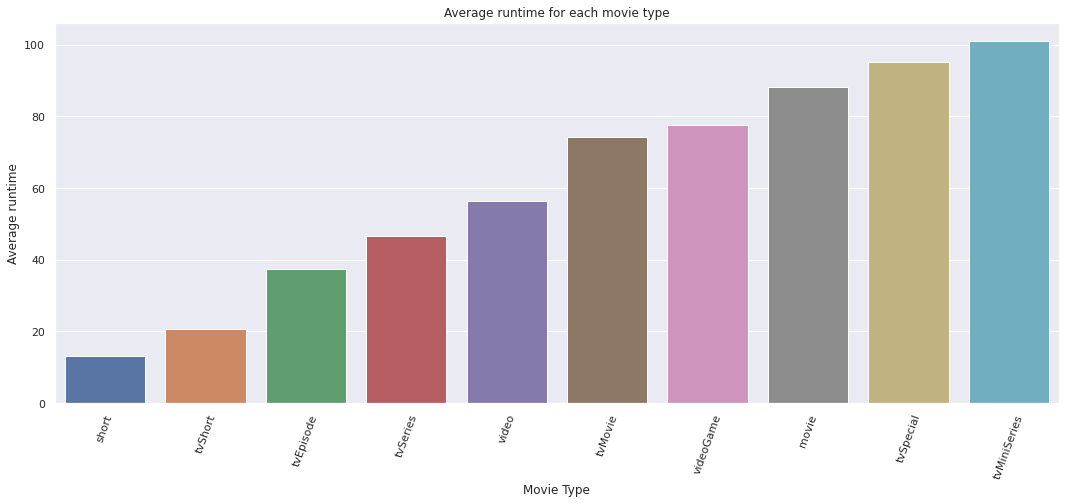

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
ax = sns.barplot(x = "titleType", y = "avg_runtime", data = res4.toPandas())
ax.set(title = "Average runtime for each movie type", xlabel = "Movie Type", ylabel = "Average runtime")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Top 20 people associated to the highest number of titles 

In [ ]:
query5 = """SELECT primaryName, COUNT(tconst) AS n_titles
           FROM title_principals as t
           LEFT JOIN name_basics as n
           ON t.nconst = n.nconst
           WHERE primaryName <> 'null'
           GROUP BY primaryName
           ORDER BY n_titles DESC
           LIMIT 20"""

res5 = spark.sql(query5) 
res5.show()         

+----------------+--------+
|     primaryName|n_titles|
+----------------+--------+
|     Ekta Kapoor|   16465|
|      Reg Watson|   13423|
|   Shobha Kapoor|   12766|
|   Michael Egizi|   12444|
|  Joel Beckerman|   10891|
|     Tony Warren|    9893|
|  Johnny Gilbert|    8535|
| William J. Bell|    8496|
|  Ernesto Alonso|    8415|
|    Delia Fiallo|    8408|
|      Zama Habib|    8242|
|     Alex Trebek|    8020|
|   Anil V. Kumar|    7980|
|    Edd Kalehoff|    7770|
|     Inés Rodena|    7621|
|  Tina Dharamsey|    7591|
|Lee Phillip Bell|    7482|
|Armen Chakmakian|    7346|
|Henrique Martins|    7199|
|    Bradley Bell|    7107|
+----------------+--------+



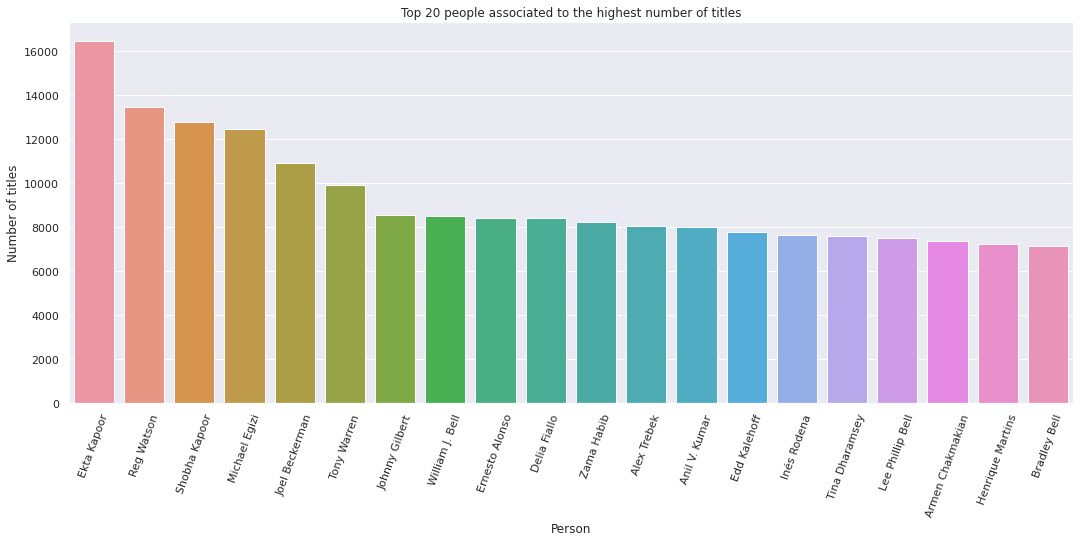

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
ax = sns.barplot(x = "primaryName", y = "n_titles", data = res5.toPandas())
ax.set(title = "Top 20 people associated to the highest number of titles", xlabel = "Person", ylabel = "Number of titles")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);  

Top 20 titles displayed in the largest number of regions

In [ ]:
query6 = """SELECT b.primaryTitle, n_regions
            FROM (SELECT titleId, COUNT(region) AS n_regions
                   FROM title_akas
                   GROUP BY titleId
                   ORDER BY n_regions DESC
                   LIMIT 20) AS a
            INNER JOIN title_basics as b
            ON a.titleId = b.tconst
            ORDER BY n_regions DESC"""

res6 = spark.sql(query6) 
res6.show()           

+--------------------+---------+
|        primaryTitle|n_regions|
+--------------------+---------+
|             Pokémon|      138|
|        Mutant Virus|       98|
|   Superhero Landing|       88|
|Star Wars: Episod...|       85|
|         Sailor Moon|       85|
|           Game Over|       77|
|The Good, the Bad...|       76|
|    Untitled Project|       76|
|Star Wars: Episod...|       71|
|Dr. Strangelove o...|       68|
|Star Wars: Episod...|       68|
|Snow White and th...|       67|
|      The Terminator|       66|
|The Godfather: Pa...|       65|
|Raiders of the Lo...|       63|
|Star Wars: Episod...|       63|
|A Fistful of Dollars|       62|
|       The Godfather|       62|
|        Ghostbusters|       61|
|               Mulan|       61|
+--------------------+---------+



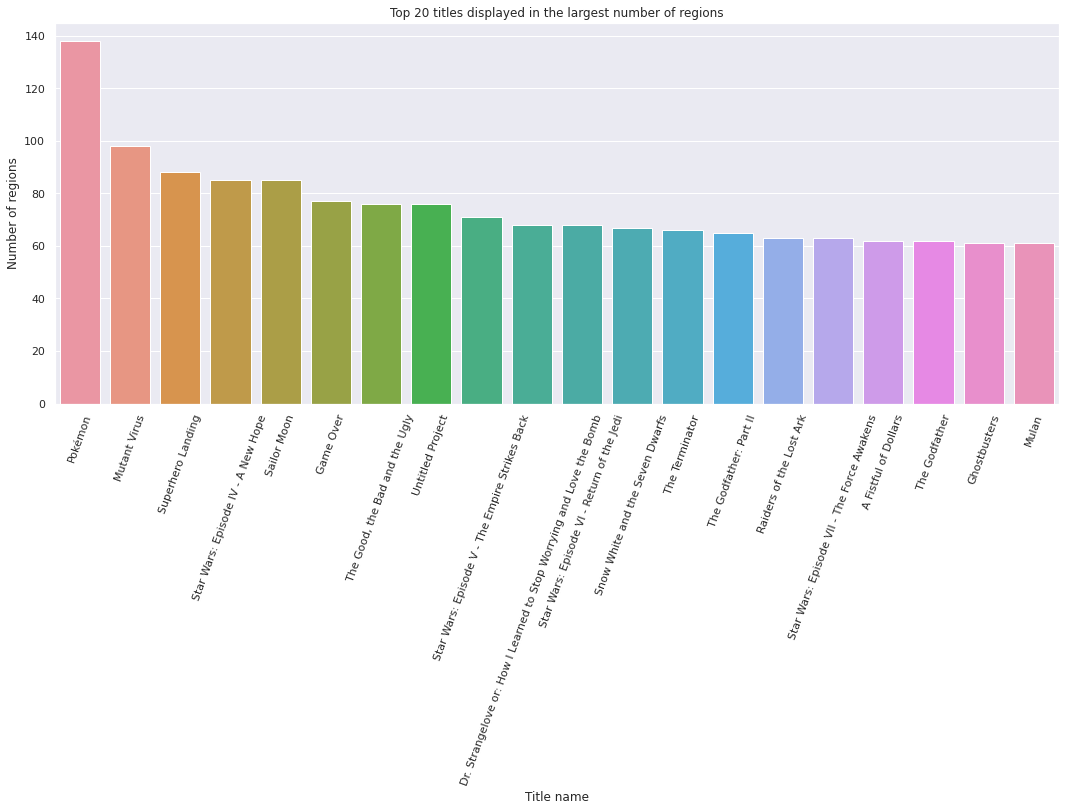

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
ax = sns.barplot(x = "primaryTitle", y = "n_regions", data = res6.toPandas())
ax.set(title = "Top 20 titles displayed in the largest number of regions", xlabel = "Title name", ylabel = "Number of regions")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

# Market Basket Analysis

FP - Growth Algorithm 

In [ ]:
from pyspark.sql.functions import collect_set

#For the mba we consider the titles as baskets and only the actors/actresses as items
mba_data = spark.sql("""SELECT b.primaryTitle, n.primaryName
                       FROM title_basics as b
                       INNER JOIN title_principals as p 
                       ON b.tconst = p.tconst
                       INNER JOIN name_basics as n
                       ON p.nconst = n.nconst
                       WHERE p.category in ('actress','actor')""") 
baskets = mba_data.groupBy('primaryTitle').agg(collect_set('primaryName').alias('actors'))
baskets.createOrReplaceTempView('baskets')

In [ ]:
baskets.toPandas().head(5)

,primaryTitle,actors
0,"""Akatuski"" shinkô","[Chie Nakamura, Kazuhiko Inoue, Junko Takeuchi..."
1,"""Aki no Koraku! Ranchi Bokkusu wa Yabu no Naka...","[Kôji Yusa, Jûrôta Kosugi, Rie Kugimiya, Rina ..."
2,"""Akubokutosen! Esupa wa Tsurai yo"" (A Virtuous...","[Kôji Yusa, Aya Hirano, Jûrôta Kosugi, Rie Kug..."
3,"""Alte Ratsklause"" in Berlin","[Christian Eckert, Frank Rosin]"
4,"""American Idol"" Judge Randy Jackson and 70s Fu...",[Adam Meir]


In [ ]:
from pyspark.ml.fpm import FPGrowth

fpGrowth = FPGrowth(itemsCol="actors", minSupport=0.001, minConfidence=0)
model = fpGrowth.fit(baskets) #one iteration lasts about 7 minutes

In [ ]:
#Display frequent itemsets
mostPopularActorInAMovie = model.freqItemsets
mostPopularActorInAMovie.createOrReplaceTempView("mostPopularActorInAMovie")
mostPopularActorInAMovie.show()

#Display the generated association rules
associationRules = model.associationRules
associationRules.createOrReplaceTempView("associationRules")
associationRules.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+----+
|               items|freq|
+--------------------+----+
|       [Eva Pedraza]|2465|
|[Eva Pedraza, Luz...|2321|
|[Eva Pedraza, Lui...|2316|
|[Eva Pedraza, Lui...|2316|
|   [Sameera Sherief]|3268|
|[Sameera Sherief,...|3178|
|[Sameera Sherief,...|2102|
|[Sameera Sherief,...|2062|
|[Sameera Sherief,...|2267|
|[Sameera Sherief,...|2178|
|[Sameera Sherief,...|2138|
|[Sameera Sherief,...|2343|
| [Dee Bradley Baker]|2111|
|    [Thomas Sanders]|1961|
|       [Lydia Bruce]|2257|
|[Lydia Bruce, Joh...|1967|
|[Lydia Bruce, Jam...|2107|
|          [Yilin Fu]|2900|
|[Andi Arsyil Rahman]|2188|
|[Andi Arsyil Rahm...|2185|
+--------------------+----+
only showing top 20 rows

+--------------------+--------------------+------------------+-----------------+--------------------+
|          antecedent|          consequent|        confidence|             lift|             support|
+--------------------+--------------------+------------------+-----------------+------------------

In [ ]:
#The transform method examines the input items against all the association rules and summarizes the consequents as a prediction
associations = model.transform(baskets)
associations.show()

+--------------------+--------------------+----------+
|        primaryTitle|              actors|prediction|
+--------------------+--------------------+----------+
|   "Akatuski" shinkô|[Chie Nakamura, K...|        []|
|"Aki no Koraku! R...|[Kôji Yusa, Jûrôt...|        []|
|"Akubokutosen! Es...|[Kôji Yusa, Aya H...|        []|
|"Alte Ratsklause"...|[Christian Eckert...|        []|
|"American Idol" J...|         [Adam Meir]|        []|
|"Antidote" by Tra...|     [Daren Jackson]|        []|
|"Ask A Black Dude...|[Victor Dean, Ton...|        []|
|"Bad Things" - MG...|     [Daren Jackson]|        []|
|"Bad and Boujee" ...|    [Todd Nathanson]|        []|
|"Birthday Song" -...|     [Daren Jackson]|        []|
|"Blank Space" by ...|[Malinda Kathleen...|        []|
|"Bohemian Rhapsod...|[Malinda Kathleen...|        []|
|"Bottled Up" Revi...|      [Alana Jordan]|        []|
|"Breaking Bad" Blues|        [Joe Gannon]|        []|
|"Captain America:...|        [Joe Gannon]|        []|
|"Captain 

In [ ]:
#Display the most frequent baskets of actors (containing at least 2 actors)

query7 = """select items, freq
           from mostPopularActorInAMovie
           where size(items) > 2
           order by freq desc
           limit 20"""
spark.sql(query7).show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[Ravi Kiran, Moun...|3253|
|[Kavita Lad, Same...|3178|
|[Kavita Lad, Ravi...|3175|
|[Kavita Lad, Ravi...|3175|
|[Kavita Lad, Ravi...|3175|
|[Ravi Kiran, Moun...|3175|
|[Ravi Kiran, Moun...|3175|
|[Kavita Lad, Moun...|3175|
|[Kavita Lad, Moun...|3175|
|[Kavita Lad, Ravi...|3175|
|[Kavita Lad, Ravi...|3175|
|[Kavita Lad, Moun...|3175|
|[Kavita Lad, Ravi...|3175|
|[Ravi Kiran, Same...|3175|
|[Kavita Lad, Ravi...|3175|
|[Mounica, Sameera...|3175|
|[Pallavi Ramisett...|3046|
|[Pallavi Ramisett...|3046|
|[Pallavi Ramisett...|3046|
|[Pallavi Ramisett...|3046|
+--------------------+----+



In [ ]:
#Display the most frequent association rules, selecting them in desceding order by the confidence
query8 = """select antecedent as `antecedent (if)`, consequent as `consequent (then)`, confidence
           from associationRules
           order by confidence desc
           limit 20"""

spark.sql(query8).show()

+--------------------+--------------------+----------+
|     antecedent (if)|   consequent (then)|confidence|
+--------------------+--------------------+----------+
|[Jui Gadkari, And...|        [Astad Kale]|       1.0|
|[Jui Gadkari, Har...|   [Sameera Sherief]|       1.0|
|[Jui Gadkari, And...|         [Mat Solar]|       1.0|
|[Vandana Vithlani...|      [Nani Widjaja]|       1.0|
|[Jui Gadkari, And...|      [Nani Widjaja]|       1.0|
|[Vandana Vithlani...|   [Sameera Sherief]|       1.0|
|[Jui Gadkari, And...|[Subhalekha Sudha...|       1.0|
|[Mat Solar, Andi ...|         [Hari Teja]|       1.0|
|[Jui Gadkari, And...|   [Sameera Sherief]|       1.0|
|[Jui Gadkari, Har...|        [Ravi Kiran]|       1.0|
|[Jui Gadkari, And...|           [Mounica]|       1.0|
|[María Bouzas, Ma...|[Subhalekha Sudha...|       1.0|
|[Devoleena Bhatta...|      [Citra Kirana]|       1.0|
|[María Bouzas, Ma...| [Rohini Hattangadi]|       1.0|
|[Devoleena Bhatta...|[Subhalekha Sudha...|       1.0|
|[María Bo